## Import Libraries ##

In [1]:
import math
import warnings

from IPython.display import display
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

### Description of Iris Dataset ###


*  This is one of the most famous datasets in the world.  The dataset was used in a famous paper by Fisher (1936).

* Attribute information:
  1. sepal length in cm 
  2. sepal width in cm 
  3. petal length in cm 
  4. petal width in cm 
  5. class: 
    Iris Setosa 
    Iris Versicolour  
    Iris Virginica

* References:

* Fisher,R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936);

In [4]:
# bring in dataset
iris = pd.read_csv('./iris.data')

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.100,3.500,1.400,0.200,Iris-setosa
1,4.900,3.000,1.400,0.200,Iris-setosa
2,4.700,3.200,1.300,0.200,Iris-setosa
3,4.600,3.100,1.500,0.200,Iris-setosa
4,5.000,3.600,1.400,0.200,Iris-setosa


In [15]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


### Set up Models ###


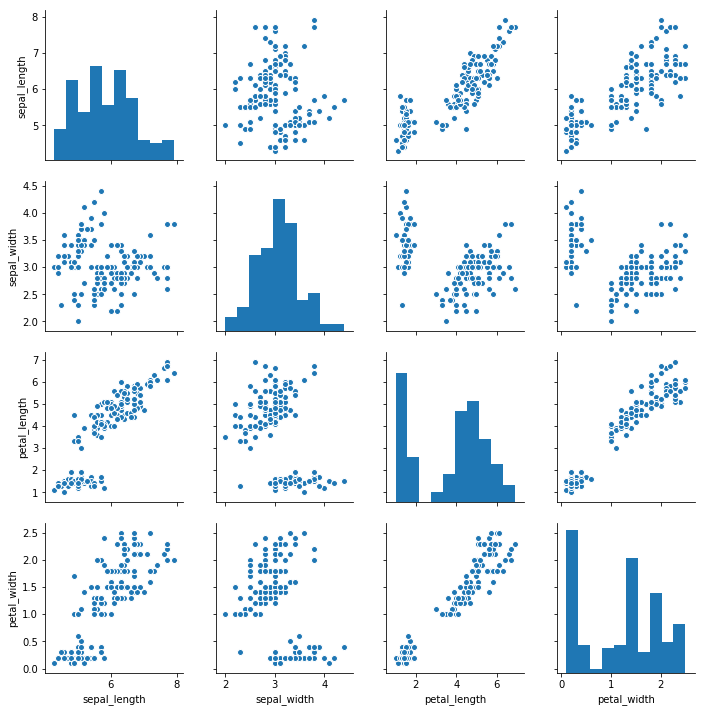

In [6]:
sns.pairplot(iris)

* An excellent simple regression model will be to predict petal_length by petal_width

* Relationship looks linear according to pairplot above.

* Let's see if KNN Regression can do as well as Linear Regression which should have a natural advantage on an obvious linear relationship.

In [14]:
# needed to change X,Y for plot to work
X = iris.petal_width.ravel().reshape(-1, 1)
Y = iris.petal_length.ravel()

# fit an initial model
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients-Linear Model: \n', regr.coef_)
print('\nIntercept-Linear Model: \n', regr.intercept_)
print('\nR-squared-Linear Model:')
print(regr.score(X, Y))

# KNN Regression
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn.fit(X, Y)
# Inspect the results.

print('\nR-squared-KNN (k=10):')
print(knn.score(X, Y))


Coefficients-Linear Model: 
 [2.22588531]

Intercept-Linear Model: 
 1.0905721458773794

R-squared-Linear Model:
0.9269012279220037

R-squared-KNN (k=10):
0.9602319837689607


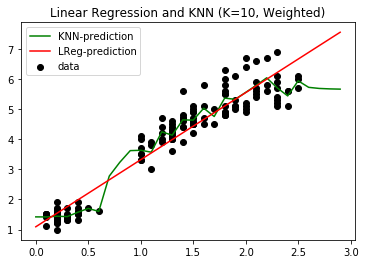

In [18]:
# Set up our prediction line.
T = np.arange(0, 3, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)
Yreg = regr.intercept_ + regr.coef_*T
plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='KNN-prediction')
plt.plot(T, Yreg, c='r', label='LReg-prediction')
plt.legend()
plt.axis('tight')
plt.title('Linear Regression and KNN (K=10, Weighted)')
plt.show()

#### Observations ####

* Note the KNN has variations in it's predictions even in areas with no data (0.5-1.0).

* KNN has can fit additional structure in the training data but can be subject to higher variance on unseen data.

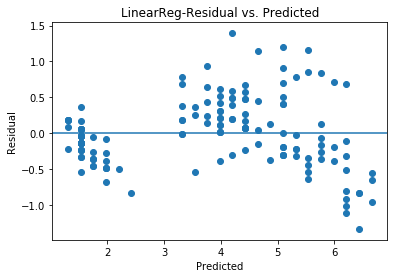

In [20]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = iris.petal_length

# Calculate the error, also called the residual.
residual = actual - predicted

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('LinearReg-Residual vs. Predicted')
plt.show()

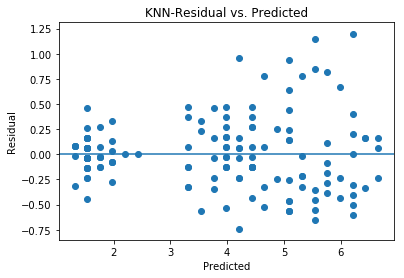

In [21]:
# Extract predicted values.
predictedknn = knn.predict(X).ravel()
residual = actual - predictedknn

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('KNN-Residual vs. Predicted')
plt.show()

* KNN looks like a better fit than the Linear Regression.

* The linear regression looks systematically biased negatively for high prediction levels

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

regr.fit(X_train,y_train)
knn.fit(X_train,y_train)

print("Linear Regression test set R squared =",regr.score(X_test,y_test))
print("KNN test set R-squared", knn.score(X_test,y_test))

Linear Regression test set R squared = 0.9421150452452899
KNN test set R-squared 0.9399633258633846


### Discussion ###

* From basic results of the bias-variance trade-off of estimators, we know that Linear Regression is a high bias but low variance estimator while nonparametrics such as KNN have lower bias but higher variance on unseen data.

* From the plot above, we see that KNN can be subject to high variance (noisy estimates) in areas with no actual data.

* KNN also is subject to the Curse of Dimensionality.  We will not be able to use it in situations with high dimensional predictors.  Linear Regression can work with even very high dimensional inputs with little problem.

* KNN was able to find a marginal amount of increased structure in the dataset it's R squared was slightly higher than what linear regression was capable off even in an extremely linear low noise dataset.

* Analyzing the train-test split, Linear Regression appeared to have a small increase in out-of-sample R squared compared to KNN.  This is consistent with the possiblity of overfit in flexible nonlinear methods like KNN.